In [1]:
import os
import sys
import argparse
from os.path import dirname, realpath


In [2]:
sys.path.append("./src/")
sys.path.append(dirname(dirname(realpath(os.getcwd()))))

In [2]:
%run load_PheOnly.py

In [52]:
wt00 = np.where(gold0 == 1, 1/.064, 1)

In [514]:
np.mean(gold0)

0.019012527634487842

In [30]:
wts01 = np.where(gold1 == 1,1/(np.mean(gold1)), 1/(1-mp1) )
wts02 = np.where(gold2 == 1,1/(np.mean(gold2)), 2/((1-mp2)) )
wts03 = np.where(gold3 == 1,1/(np.mean(gold3)), 3/((1-mp3)) )
wts04 = np.where(gold4 == 1,1/(np.mean(gold4)), 4/((1-mp4)))

In [31]:
wts1234 = np.concatenate((wts01,wts02, wts03, wts04))
y1234 = np.concatenate((gold1,gold2, gold3, gold4))
lo1234 = logit( np.concatenate((mp1,mp2, mp3, mp4)) )
tlo1234 = logit( np.concatenate((tp1,tp2, tp3, tp4)) )
ti = np.concatenate((np.ones(len(mp1)), 2*np.ones(len(mp2)), 3*np.ones(len(mp3)), 4*np.ones(len(mp4))))
tti = np.concatenate((np.ones(len(tp1)), 2*np.ones(len(tp2)), 3*np.ones(len(tp3)), 4*np.ones(len(tp4))))

In [32]:
def weighted_temp2_scaling (logits, y, wts):
    def temperature_obj(t):
        temp_logits =   (logits + t[1]) /  t [0]  
        probs = expit(temp_logits)
        return log_loss(y, probs, sample_weight=wts)    
    res = minimize (temperature_obj,x0 = [.1,.1])
    return res.x

In [33]:
alpha_0_1234  = weighted_temp2_scaling(  lo1234 , y1234,  wts1234)


In [34]:
pc = temp_pred2(alpha_0_1234, lo1234 )

(array([ 9329., 11000.,  9075.,  7501.,  5737.,  4183.,  3019.,  2191.,
         1033.,   166.]),
 array([0.05388841, 0.12740711, 0.20092581, 0.27444451, 0.34796321,
        0.42148191, 0.49500061, 0.56851931, 0.64203801, 0.71555671,
        0.78907541]),
 <BarContainer object of 10 artists>)

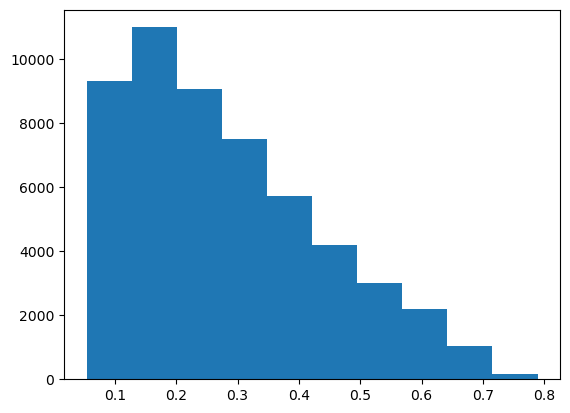

In [35]:
plt.hist(pc)

In [36]:
wts1 = np.where(gold1 == 1, 1/np.mean(gold1), 1/(1-pc) [ti==1])
wts2 = np.where(gold2 == 1, 2/np.mean(gold2), 2/(1-pc) [ti==2])
wts3 = np.where(gold3 == 1, 3/np.mean(gold3), 3/(1-pc) [ti==3])
wts4 = np.where(gold4 == 1, 4/np.mean(gold4), 4/(1-pc) [ti==4])

In [37]:
def weighted_temp2_scaling_i (logits, y, wts):
    def temperature_obj(t):
        temp_logits =   (logits + t[1]) /  t [0]  
        probs = expit(temp_logits)
        return log_loss(y, probs, sample_weight=wts)    
    res = minimize (temperature_obj,x0 = [.1,.1])
    return res

In [38]:
def temperature_multi_w(l1, l2,l3,l4, y1, y2, y3, y4, w1, w2, w3, w4):
    def temperature_obj(t):
        logi_1 = (l1 +  t[1])  / t[5] 
        logi_2 = (l2 +  t[2])  / t[6] 
        logi_3 = (l3 +  t[3])  / t[7] 
        logi_4 = (l4 +  t[4])  / t[8] 
        
        p1  = expit (t[0] +  logi_1  )  
        p2  = expit ( t[0] +  logi_2  )  
        p3  = expit (t[0] +  logi_3  )  
        p4  = expit ( t[0] + logi_4  ) 
        total_loss=log_loss(y1,p1,sample_weight=w1)+log_loss(y2,p2,sample_weight=w2)+log_loss(y3,p3,sample_weight=w3)+log_loss(y4,p4,sample_weight=w4)        
        return   total_loss
    r = minimize (temperature_obj, x0 = [.1, .1, .1,.1, 
                                         .1, .1,.1, .1, .1  ] )    
    return  r

In [39]:
tt  = temperature_multi_w( logit(mp1), logit(mp2), logit(mp3), logit(mp4),
                          gold1, gold2, gold3, gold4, wts1, wts2, wts3, wts4  )

In [40]:
tt

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 2.5738641861892293
        x: [ 2.860e+00 -6.535e+00 -2.269e+00 -1.009e+00  2.486e-01
             2.339e+00  1.368e+00  1.141e+00  7.451e-01]
      nit: 68
      jac: [ 2.235e-06  8.941e-08  1.281e-06  2.980e-08  3.278e-07
             3.874e-07  3.457e-06 -4.768e-07  2.682e-07]
 hess_inv: [[ 4.289e+01  1.648e+02 ...  1.646e+01  2.490e+00]
            [ 1.648e+02  2.360e+03 ... -2.079e+01 -5.717e+00]
            ...
            [ 1.646e+01 -2.079e+01 ...  2.073e+01 -5.746e-01]
            [ 2.490e+00 -5.717e+00 ... -5.746e-01  5.006e+00]]
     nfev: 720
     njev: 72

In [41]:
def temp_pred  ( j1,j2, test_logit):    
    logi =  ( test_logit   + j1) / j2     
    proba = expit (  logi +tt.x[0]  )  
    return proba

In [56]:
cal_1 = temp_pred(tt.x[1],tt.x[5], logit(tp1) )
cal_2 = temp_pred(tt.x[2],tt.x[6], logit(tp2) )
cal_3 = temp_pred(tt.x[3],tt.x[7], logit(tp3) )
cal_4 = temp_pred(tt.x[4],tt.x[8], logit(tp4) )

y1, p1 = calibration_curve(M_test1['golds'], cal_1 , n_bins = 600)
y2, p2 = calibration_curve(M_test2['golds'], cal_2 , n_bins = 600)
y3, p3 =calibration_curve(M_test3['golds'], cal_3 , n_bins = 500)
y4, p4 = calibration_curve(M_test4['golds'], cal_4 , n_bins = 500)



(array([1252., 1987., 1956., 1658., 1323., 1149.,  791.,  472.,  189.,
          33.]),
 array([0.09315088, 0.17330899, 0.2534671 , 0.33362522, 0.41378333,
        0.49394144, 0.57409956, 0.65425767, 0.73441578, 0.8145739 ,
        0.89473201]),
 <BarContainer object of 10 artists>)

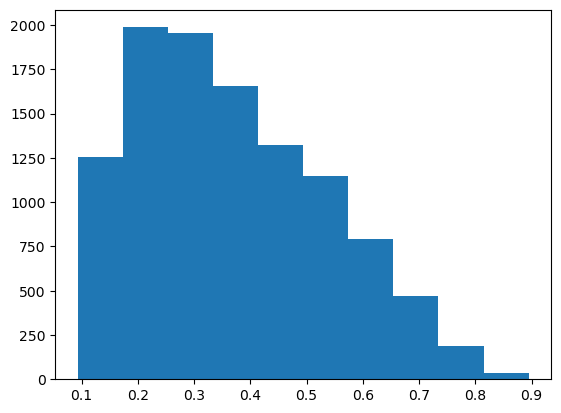

In [57]:
plt.hist(cal_4)

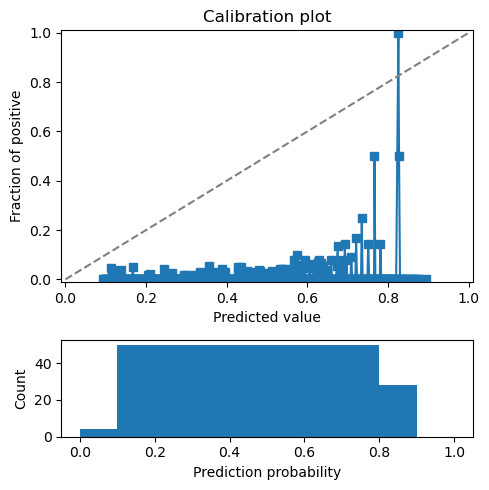

In [58]:
plotter(p4, y4)

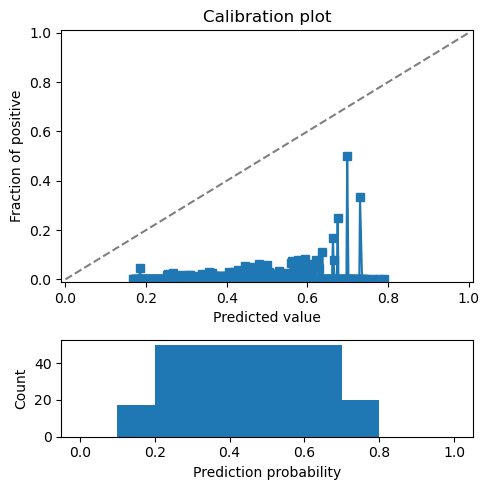

In [59]:
plotter(p3, y3)


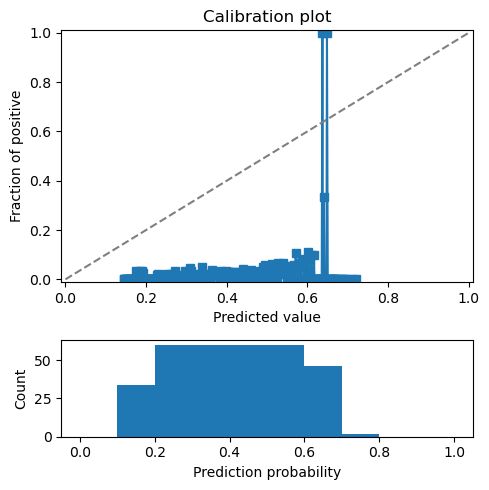

In [60]:
plotter(p2, y2)

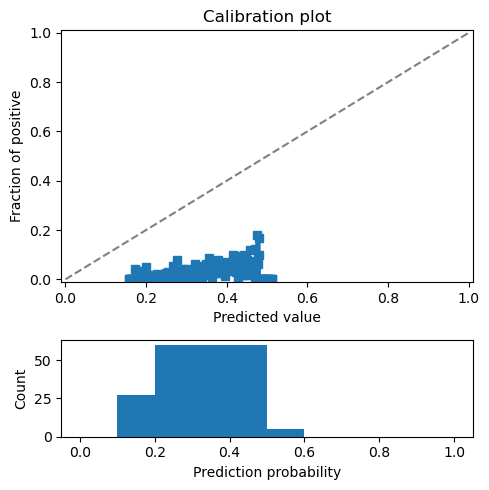

In [61]:
plotter(p1, y1)

In [62]:
cal_1 = temp_pred(tt.x[1],tt.x[5], logit(tp1) )
cal_2 = temp_pred(tt.x[2],tt.x[6], logit(tp2) )
cal_3 = temp_pred(tt.x[3],tt.x[7], logit(tp3) )
cal_4 = temp_pred(tt.x[4],tt.x[8], logit(tp4) )

y1, p1 = calibration_curve(M_test1['golds'], cal_1 , n_bins = 1000)
y2, p2 = calibration_curve(M_test2['golds'], cal_2 , n_bins = 1000)
y3, p3 =calibration_curve(M_test3['golds'], cal_3 , n_bins = 1000)
y4, p4 = calibration_curve(M_test4['golds'], cal_4 , n_bins = 500)



In [63]:
len(tgold1)

16025

In [64]:
len(cal_1)

16025

In [54]:
import sklearn
from sklearn.metrics import confusion_matrix

In [67]:
[sklearn.metrics.roc_auc_score(tgold4,  tp4 , average = 'samples'),
sklearn.metrics.roc_auc_score(tgold3,  tp3 , average = 'samples'),
sklearn.metrics.roc_auc_score(tgold2,  tp2 , average = 'samples'),
sklearn.metrics.roc_auc_score(tgold1,  tp1 , average = 'samples')]


[0.7072423069302404,
 0.6854529873329583,
 0.6455460267776995,
 0.6480031999535442]

In [66]:
[sklearn.metrics.roc_auc_score(tgold4,  cal_4 , average = 'samples'),
sklearn.metrics.roc_auc_score(tgold3,  cal_3 , average = 'samples'),
sklearn.metrics.roc_auc_score(tgold2,  cal_2 , average = 'samples'),
sklearn.metrics.roc_auc_score(tgold1,  cal_1 , average = 'samples')]


[0.7072423069302404,
 0.6854529873329583,
 0.6455460267776995,
 0.6480031999535442]

In [226]:
( confusion_matrix (tgold1,  tc1>.5) )

array([[8111, 7408],
       [ 145,  361]], dtype=int64)

In [227]:
( confusion_matrix (tgold2,  tc2>.5) )

array([[12250,  1605],
       [  149,    50]], dtype=int64)

In [228]:
( confusion_matrix (tgold3,  tc3>.5) )

array([[12405,    42],
       [  130,     2]], dtype=int64)

In [229]:
( confusion_matrix (tgold4,  tc4>.5) )

array([[10584,   128],
       [   94,     4]], dtype=int64)

In [231]:
( confusion_matrix (tgold1,  tp1>.05) )

array([[ 1657, 13862],
       [   10,   496]], dtype=int64)

In [227]:
( confusion_matrix (tgold2,  tc2>.5) )

array([[12250,  1605],
       [  149,    50]], dtype=int64)

In [228]:
( confusion_matrix (tgold3,  tc3>.5) )

array([[12405,    42],
       [  130,     2]], dtype=int64)

In [229]:
( confusion_matrix (tgold4,  tc4>.5) )

array([[10584,   128],
       [   94,     4]], dtype=int64)

In [163]:
tt5  = temperature_multi_5( logit(mp1), logit(mp2), logit(mp3), logit(mp4),
                          gold1, gold2, gold3, gold4, wts1, wts2, wts3, wts4  )

In [164]:
def temp_pred5  ( j1, test_logit):    
    logi =  ( test_logit   + j1)   
    proba = expit (  logi / tt.x[0]  )  
    return proba